In [67]:
 # Import necessary libraries
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [68]:
# Load the Titanic dataset
data = pd.read_csv('../../../../../Downloads/titanic.csv')

In [69]:
data.describe()

,Age,Survived,SexCode
count,756.000000,1313.000000,1313.000000
mean,30.397989,0.342727,0.351866
std,14.259049,0.474802,0.477734
min,0.170000,0.000000,0.000000
25%,21.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000
75%,39.000000,1.000000,1.000000
max,71.000000,1.000000,1.000000


In [70]:
data.head()

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [71]:
# Data preprocessing
data = data.drop([ 'PClass','Name', 'SexCode'], axis=1)  # Drop unnecessary columns
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)  # One-hot encode categorical variables


In [72]:
# Handling missing values
data.dropna(inplace=True)

In [73]:
data.head()

,Age,Survived,Sex_male
0,29.00,1,0
1,2.00,0,0
2,30.00,0,1
3,25.00,0,0
4,0.92,1,1


In [74]:
data.describe()

,Age,Survived,Sex_male
count,756.000000,756.000000,756.000000
mean,30.397989,0.414021,0.619048
std,14.259049,0.492878,0.485942
min,0.170000,0.000000,0.000000
25%,21.000000,0.000000,0.000000
50%,28.000000,0.000000,1.000000
75%,39.000000,1.000000,1.000000
max,71.000000,1.000000,1.000000


In [75]:
# Split the data into features and target
X = data.drop('Survived', axis=1)
y = data['Survived']


In [76]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Classifier Accuracy:", dt_accuracy)

Decision Tree Classifier Accuracy: 0.7631578947368421


In [78]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)

Random Forest Classifier Accuracy: 0.7828947368421053


In [79]:
# Compare decision trees with various depths
tree_depths = range(1, 11)
tree_scores = []


In [80]:
for depth in tree_depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)
    tree_scores.append(np.mean(dt_scores))

In [81]:
tree_scores

[0.7798347107438017,
 0.8013498622589532,
 0.7996969696969696,
 0.7963498622589531,
 0.789724517906336,
 0.7781404958677686,
 0.7765151515151515,
 0.771556473829201,
 0.7632920110192837,
 0.7599862258953167]

In [82]:
# Compare random forests with various numbers of trees
n_estimators = [10, 50, 100, 200]
rf_scores = []

In [83]:
for n in n_estimators:
    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=42)
    rft_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
    rf_scores.append(np.mean(rft_scores))

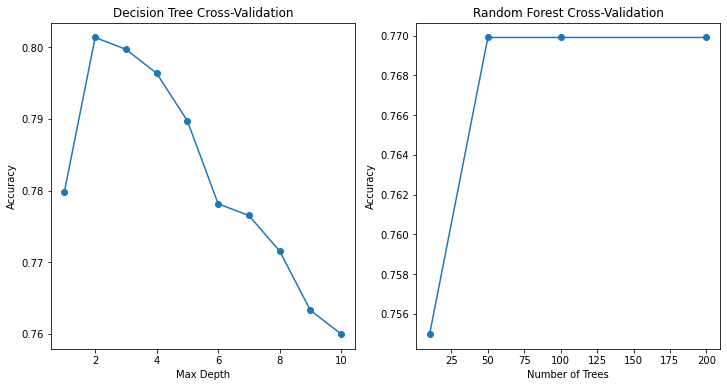

In [84]:
# visualizing the results 
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(tree_depths, tree_scores, marker='o')
plt.title('Decision Tree Cross-Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(n_estimators, rf_scores, marker='o')
plt.title('Random Forest Cross-Validation')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')

plt.show()

TF Keras MLP

In [85]:
from keras.models import Sequential
from keras.layers import Dense

In [86]:
input_dimension = X_train.shape[1]

In [98]:
# Model
model = Sequential()
model.add(Dense(2,input_dim=input_dimension, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [99]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 64)                192       
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 263
Trainable params: 263
Non-trainable params: 0
_________________________________________________________________


In [100]:
from keras.utils import plot_model

plot_model(model, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [101]:
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [102]:
# train
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2 ,verbose=True)

Epoch 1/100


16/16 [==============================] - 1s 27ms/step - loss: 0.8969 - accuracy: 0.6066 - val_loss: 0.6976 - val_accuracy: 0.4215
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.4865 - val_loss: 0.6813 - val_accuracy: 0.5785
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6744 - accuracy: 0.6066 - val_loss: 0.6781 - val_accuracy: 0.5785
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6817 - accuracy: 0.6190 - val_loss: 0.6852 - val_accuracy: 0.5702
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6807 - accuracy: 0.6066 - val_loss: 0.6776 - val_accuracy: 0.5868
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6759 - accuracy: 0.6211 - val_loss: 0.6836 - val_accuracy: 0.5702
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6786 - accuracy: 0.6149 - val_loss: 0.6783 - val_accuracy: 0.5868
Epoch 8/100
16/16 [=====

In [103]:
# evaluation method
test_loss, test_accuracy = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.6053


In [104]:
model.weights

[<tf.Variable 'dense_6/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[ 0.5519788 , -0.9759879 ],
        [ 2.3949244 , -0.95952743]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(2,) dtype=float32, numpy=array([-0.16064256,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_7/kernel:0' shape=(2, 64) dtype=float32, numpy=
 array([[ 0.11839151,  0.25729826,  0.26224092, -0.18210411, -0.22568926,
          0.04479041, -0.02616042,  0.12677449,  0.0461829 , -0.09297529,
          0.23629923,  0.284935  , -0.10945348,  0.2356259 , -0.01290008,
         -0.02175146,  0.28470838, -0.0620085 , -0.03000301, -0.04303256,
          0.22549658,  0.18451954,  0.13162974, -0.18982121, -0.04972434,
         -0.15421022,  0.00799636, -0.108436  , -0.25253785, -0.16229293,
          0.01018766,  0.19364019,  0.2713968 , -0.28987864, -0.02291393,
         -0.29991555, -0.22334528,  0.1561579 , -0.26920962,  0.2192703 ,
         -0.14294505, -0.12681141, -0.15031904, -0.23410472, -0.210

In [105]:
history.history

{'loss': [0.8969354629516602,
  0.6931006908416748,
  0.674407958984375,
  0.681708037853241,
  0.6807407736778259,
  0.6758888959884644,
  0.6785632371902466,
  0.673848032951355,
  0.6795527338981628,
  0.6791269779205322,
  0.6753423810005188,
  0.6720101833343506,
  0.6745003461837769,
  0.6852250695228577,
  0.6718107461929321,
  0.6748677492141724,
  0.6749708652496338,
  0.680313766002655,
  0.6728885173797607,
  0.6775516271591187,
  0.6761051416397095,
  0.6724840998649597,
  0.6807694435119629,
  0.6828719973564148,
  0.6783469915390015,
  0.6751265525817871,
  0.6811070442199707,
  0.6827546954154968,
  0.6731055974960327,
  0.672236442565918,
  0.6725547909736633,
  0.6834747195243835,
  0.6821988224983215,
  0.6734344363212585,
  0.6752199530601501,
  0.6867153644561768,
  0.6764572858810425,
  0.6769241094589233,
  0.6742756366729736,
  0.6709370017051697,
  0.6956554055213928,
  0.6739829182624817,
  0.680278480052948,
  0.6792631149291992,
  0.6725915670394897,
  0.6706

In [106]:
model.get_weights()

[array([[ 0.5519788 , -0.9759879 ],
        [ 2.3949244 , -0.95952743]], dtype=float32),
 array([-0.16064256,  0.        ], dtype=float32),
 array([[ 0.11839151,  0.25729826,  0.26224092, -0.18210411, -0.22568926,
          0.04479041, -0.02616042,  0.12677449,  0.0461829 , -0.09297529,
          0.23629923,  0.284935  , -0.10945348,  0.2356259 , -0.01290008,
         -0.02175146,  0.28470838, -0.0620085 , -0.03000301, -0.04303256,
          0.22549658,  0.18451954,  0.13162974, -0.18982121, -0.04972434,
         -0.15421022,  0.00799636, -0.108436  , -0.25253785, -0.16229293,
          0.01018766,  0.19364019,  0.2713968 , -0.28987864, -0.02291393,
         -0.29991555, -0.22334528,  0.1561579 , -0.26920962,  0.2192703 ,
         -0.14294505, -0.12681141, -0.15031904, -0.23410472, -0.210268  ,
         -0.08223295,  0.05656444,  0.04115517, -0.2564616 ,  0.28081962,
         -0.00132559, -0.12978303, -0.14429313,  0.06134479, -0.28407615,
          0.08006041,  0.1608084 , -0.09484375

In [107]:
# maximum accuracy
np.max(history.history['accuracy'])

0.6521739363670349

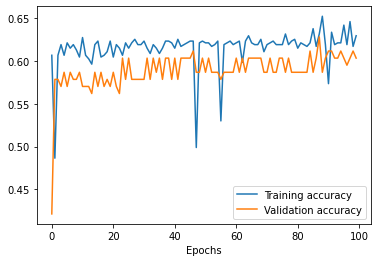

In [108]:
# Plot
import matplotlib.pyplot as plt 

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.legend()

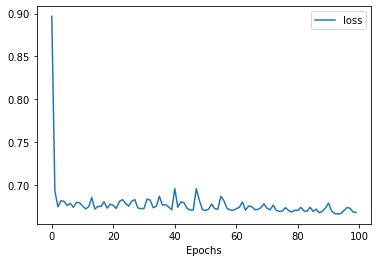

In [109]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epochs')
plt.legend()